# Maximum Likelihood Estimation (MLE)

In [2]:
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.optimize as opt
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

# globally set larger axes font size for all plots
import matplotlib as mpl
mpl.rcParams['axes.labelsize'] = 18

---
## **1. Example**: A normal distribution for a continuous random variable x (could be anything).

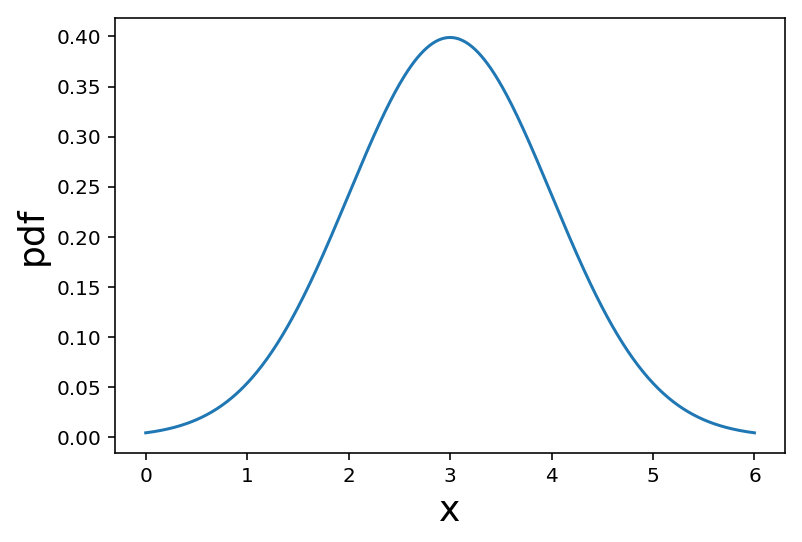

In [168]:
populationDist = st.norm(3, 1)

x = np.linspace(0, 6, 601)
plt.plot(x, dist.pdf(x))
plt.xlabel('x')
plt.ylabel('pdf');

## Grab a sample of random values from the distribution (i.e. these would be our experimental measurements).

In [170]:
randomSamplesOfX = populationDist.rvs((1000,))

randomSamplesOfX[:5]

array([2.65915789, 0.45506392, 4.47310914, 2.16755736, 2.73591284])

## Plot the distribution of our random samples (e.g. experimental data).

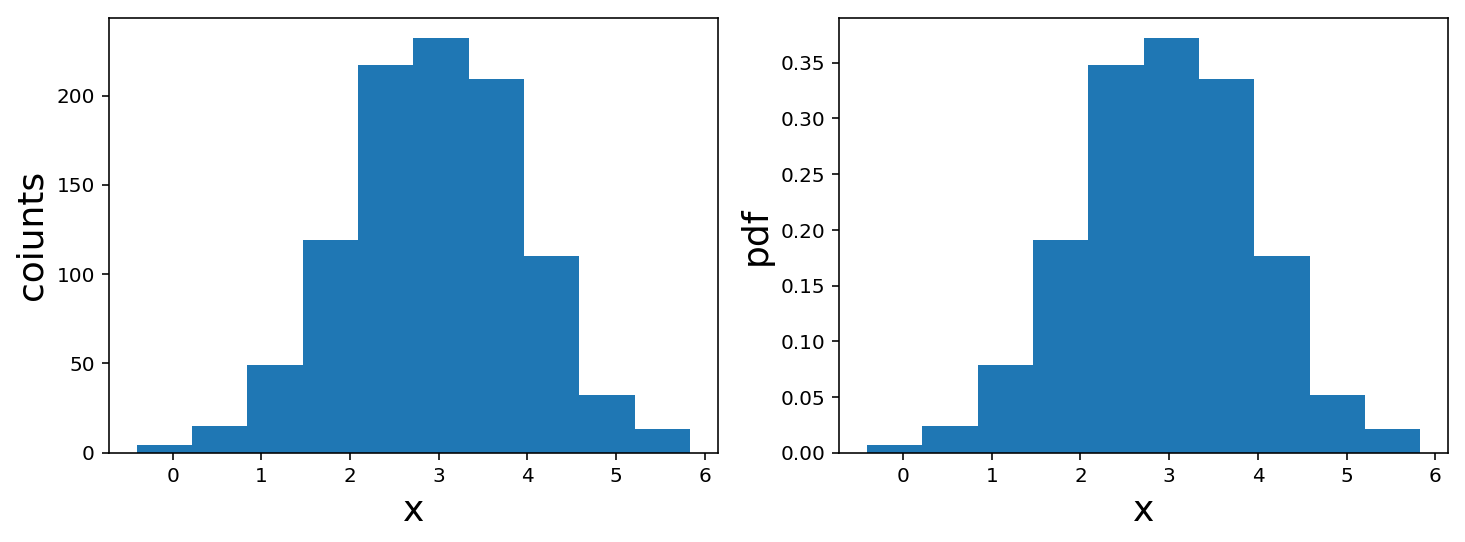

In [171]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.hist(randomSamplesOfX)
plt.xlabel('x')
plt.ylabel('coiunts');

plt.subplot(1, 2, 2)
plt.hist(randomSamplesOfX, density=True)
plt.xlabel('x')
plt.ylabel('pdf');

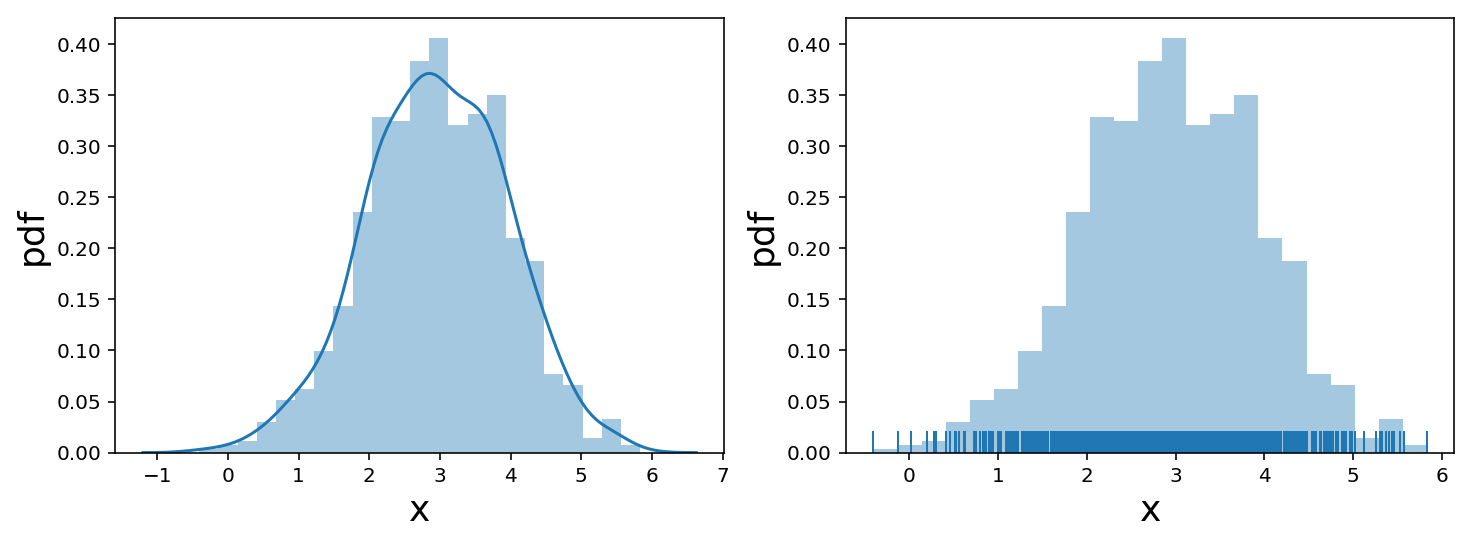

In [172]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
sns.distplot(randomSamplesOfX)
plt.xlabel('x')
plt.ylabel('pdf');

plt.subplot(1, 2, 2)
sns.distplot(randomSamplesOfX, kde=None, norm_hist=True, rug=True)
plt.xlabel('x')
plt.ylabel('pdf');

## What are the maximum likelihood estimation (MLE) of the parameters (mean, standard deviation) of the normal distribution that best describes the data (*assume we don't know about the population distribution form which the samples came, which is almost always the case for real data*)?

In [173]:
# maximum likelihood estimate of distribution parameters given the sampled data
mu, sd = st.norm.fit(randomSamplesOfX)

mu, sd

(2.9585023352499094, 0.9971506546506428)

## Plot the data overlaid with the inferred (MLE fit) distribution and the true population distribution.

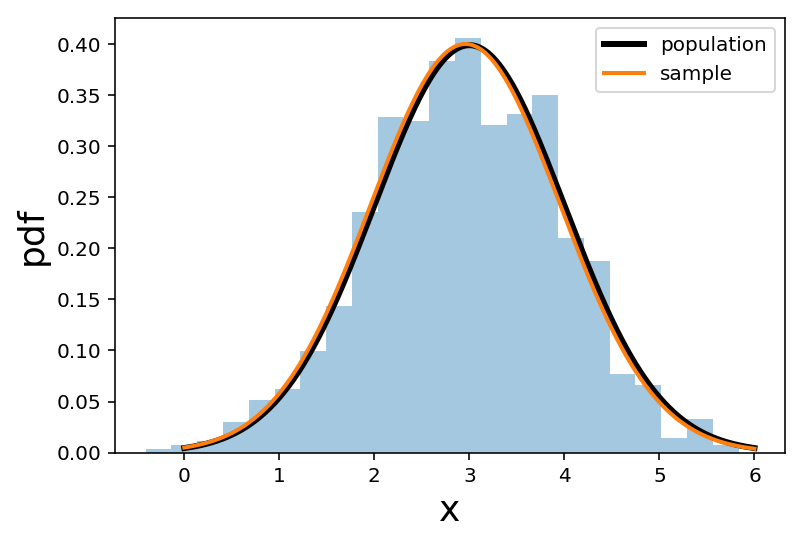

In [174]:
# MLE of sample distribution
sampleDist = st.norm(mu, sd)

x = np.linspace(0, 6, 601)

sns.distplot(randomSamplesOfX, kde=None, norm_hist=True)
plt.plot(x, populationDist.pdf(x), 'k', lw=3, label='population')
plt.plot(x, sampleDist.pdf(x), lw=2, label='sample')
plt.xlabel('x')
plt.ylabel('pdf')
plt.legend();

## Loglikelihood vs mean

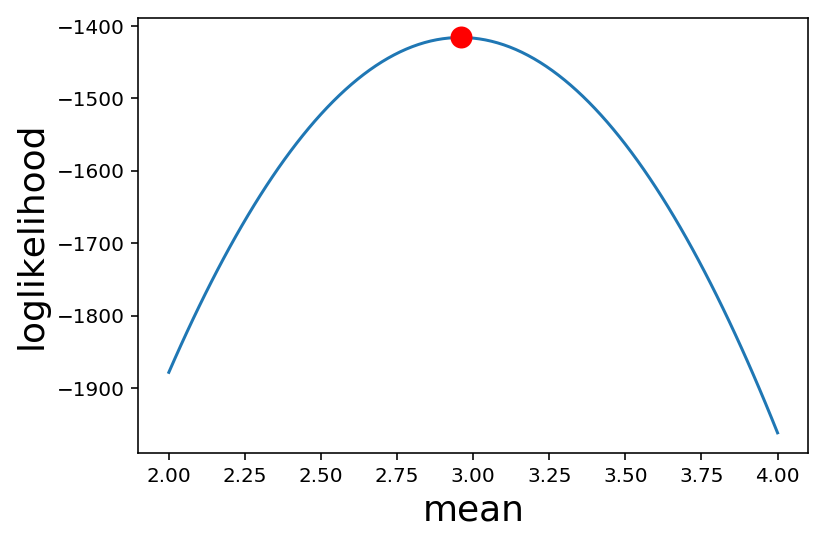

In [175]:
# returns loglikelihood of a normal distribution with input mean and standard deviation of 1 given the sample data
def loglikelihood(mu):
    return st.norm.logpdf(randomSamplesOfX, mu, 1).sum()

means = np.linspace(2, 4, 101)
LL = np.zeros(means.shape)

for i, mx in enumerate(means):
    LL[i] = loglikelihood(mx)

plt.plot(means, LL)
plt.plot(mu, loglikelihood(mu), 'ro', ms=10)
plt.xlabel('mean')
plt.ylabel('loglikelihood');

## Loglikelihood vs standard deviation

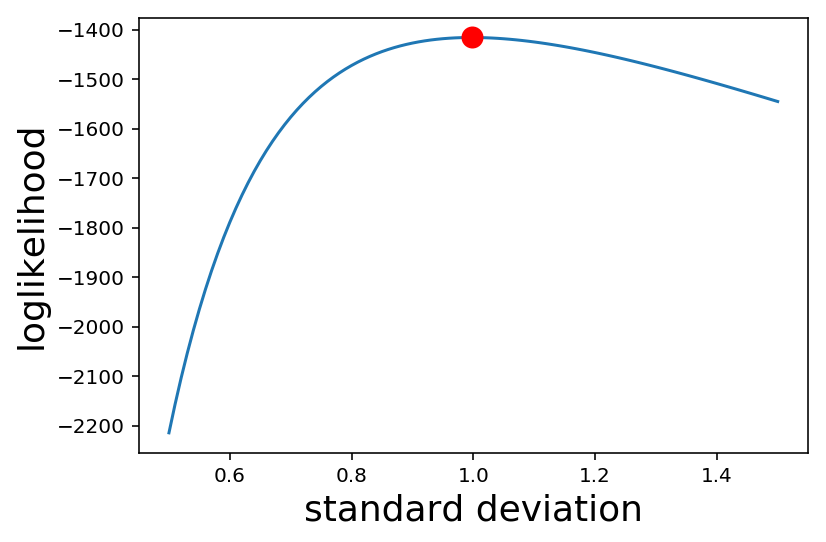

In [176]:
# returns loglikelihood of a normal distribution with input standard deviation and mean of 3 given the sample data
def loglikelihood(sd):
    return st.norm.logpdf(randomSamplesOfX, 3, sd).sum()

stdevs = np.linspace(0.5, 1.5, 101)
LL = np.zeros(stdevs.shape)

for i, sx in enumerate(stdevs):
    LL[i] = loglikelihood(sx)

plt.plot(stdevs, LL)
plt.plot(sd, loglikelihood(sd), 'ro', ms=10)
plt.xlabel('standard deviation')
plt.ylabel('loglikelihood');

## Loglikelihood vs mean and standard deviation

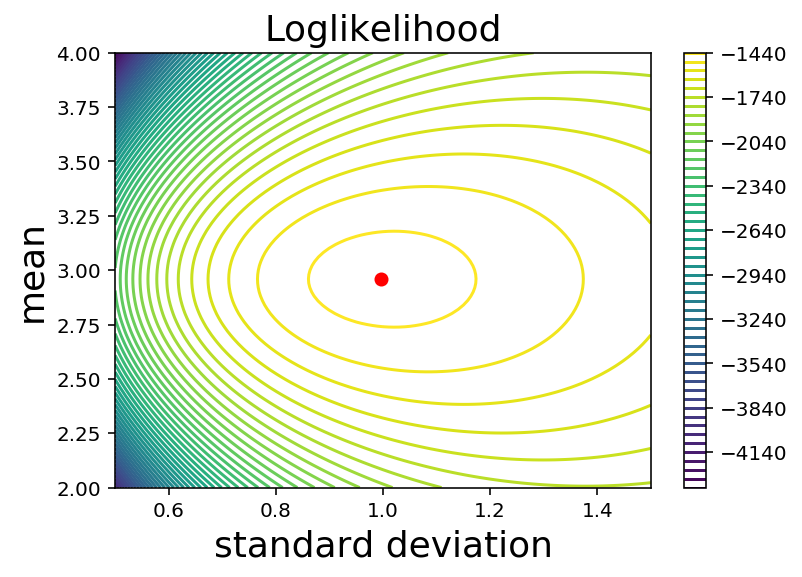

In [177]:
# returns loglikelihood of a normal distribution with input mean and standard deviation given the sample data
def loglikelihood(mu, sd):
    return st.norm.logpdf(randomSamplesOfX, mu, sd).sum()

means = np.linspace(2, 4, 101)
stdevs = np.linspace(0.5, 1.5, 101)
LL = np.zeros((101, 101))

for i, mx in enumerate(means):
    for j, sx in enumerate(stdevs):
        LL[i,j] = loglikelihood(mx, sx)

plt.contour(stdevs, means, LL, 50)
plt.plot(sd, mu, 'ro')
plt.xlabel('standard deviation')
plt.ylabel('mean')
plt.title('Loglikelihood', fontsize=18)
plt.colorbar();

## <font color=red>Exercise</font>

1. Repeat the above for a smaller sample size, e.g. 100. *Hint: Reuse the above cells, just change the sample size.*

## Loglikelihood vs mean for different sample sizes

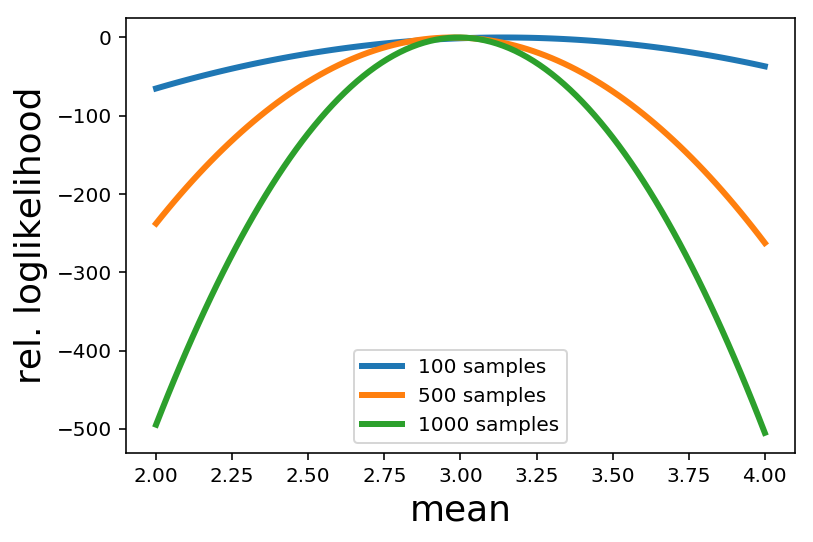

In [191]:
sampleNs = [100, 500, 1000]
means = np.linspace(2, 4, 101)
LL = np.zeros(means.shape)

for i in range(len(sampleNs)):
    N = sampleNs[i]
    samples = populationDist.rvs((N,))
    for j, mx in enumerate(means):
        LL[j] = st.norm.logpdf(samples, mx, 1).sum()
    plt.plot(means, LL-LL.max(), lw=3, label=f"{N} samples")

plt.xlabel('mean')
plt.ylabel('rel. loglikelihood')
plt.legend();

---
## **2. Example**: You record intervals between lever presses of a subject that presses a lever for a reward at a constant averge rate of 12.5 times per minute. The data are given below:

In [19]:
rate = 12.5  # lever presses per minute

populationDist = st.expon(loc=0, scale=1/rate)

measuredIntervals = populationDist.rvs((1000,))

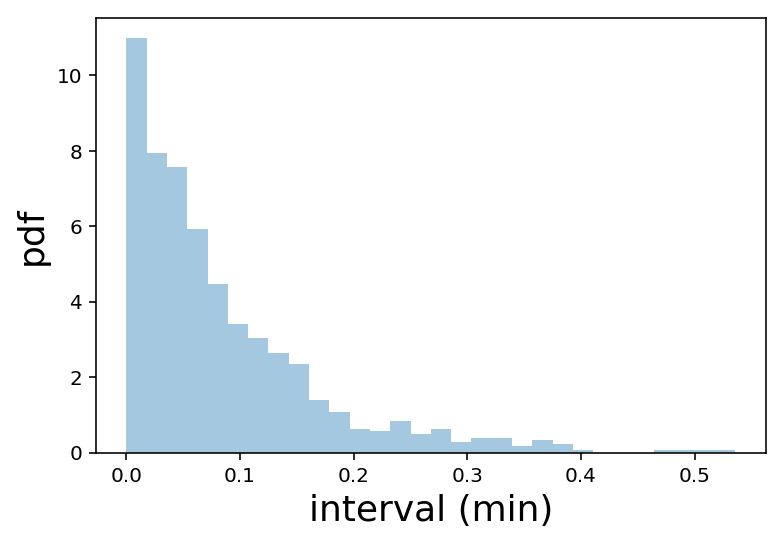

In [20]:
# intervals from 0 to 0.6 minutes
t = np.linspace(0, 0.6, 601)

sns.distplot(measuredIntervals, kde=None, norm_hist=True)
plt.xlabel('interval (min)')
plt.ylabel('pdf');

## Due to a lab accident, the data are corrupted and you only save the last 25% of your measurements. Use the remaining data to estimate the distribution of intervals between lever presses and compare it to the estimate from the full original data set.

In [21]:
# maximum likelihood estimate of distribution parameters given the original sampled data
loc, tau = st.expon.fit(measuredIntervals, floc=0)

fullSampleRateMLE = 1 / tau

# MLE of distribution for all observations
fullSampleDist = st.expon(loc=0, scale=tau)

In [22]:
# maximum likelihood estimate of distribution parameters given only the uncorrupted portion of the sampled data
uncorruptedIntervals = measuredIntervals[750:]
loc, tau = st.expon.fit(uncorruptedIntervals, floc=0)

partialSampleRateMLE = 1 / tau

# MLE of distribution for remaining uncorrupted observations
partialSampleDist = st.expon(loc=0, scale=tau)

In [23]:
fullSampleRateMLE, partialSampleRateMLE

(11.924246323723626, 11.863644906784831)

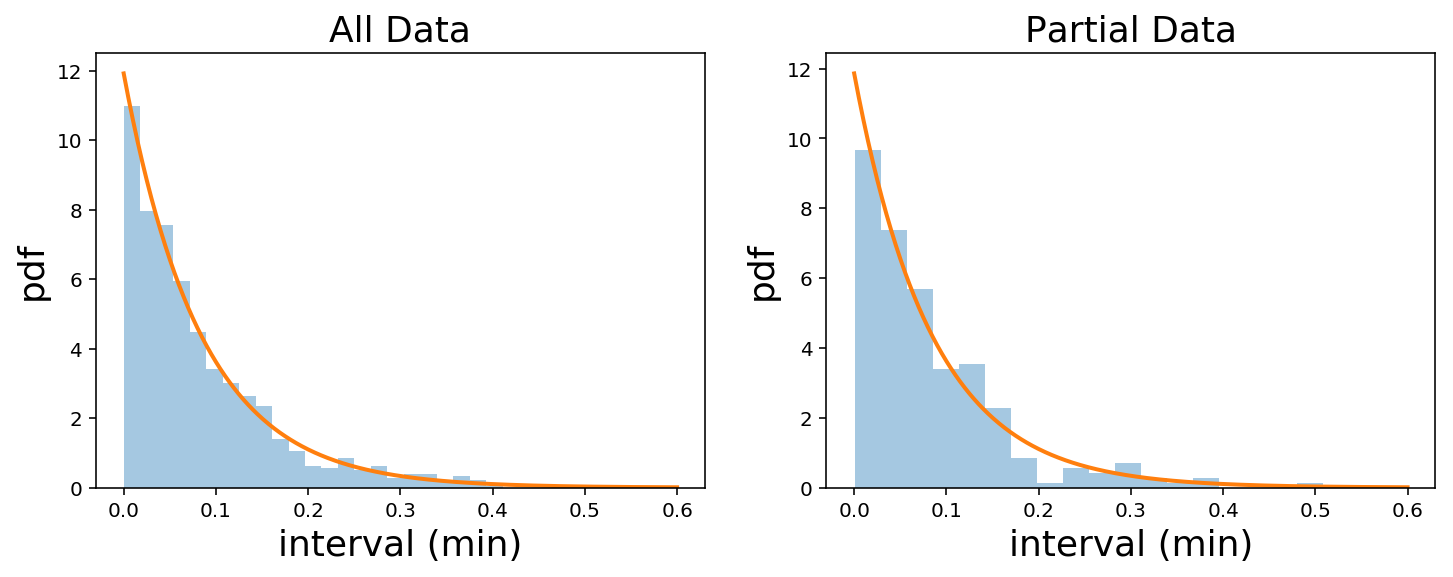

In [24]:
plt.figure(figsize=(12,4))

# intervals from 0 to 0.6 minutes
t = np.linspace(0, 0.6, 601)

plt.subplot(1, 2, 1)
sns.distplot(measuredIntervals, kde=None, norm_hist=True)
plt.plot(t, fullSampleDist.pdf(t), lw=2)
plt.xlabel('interval (min)')
plt.ylabel('pdf')
plt.title('All Data', fontsize=18);

plt.subplot(1, 2, 2)
sns.distplot(uncorruptedIntervals, kde=None, norm_hist=True)
plt.plot(t, partialSampleDist.pdf(t), lw=2)
plt.xlabel('interval (min)')
plt.ylabel('pdf')
plt.title('Partial Data', fontsize=18);

## Loglikelihood vs lever press rate

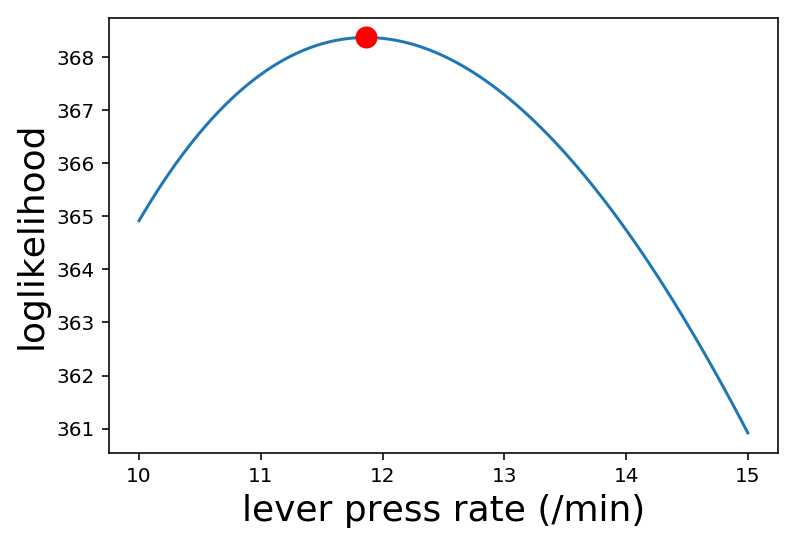

In [25]:
def loglikelihood(rate):
    return st.expon.logpdf(uncorruptedIntervals, 0, 1/rate).sum()

rates = np.linspace(10, 15, 101)
LL = np.zeros(rates.shape)

for i, rate in enumerate(rates):
    LL[i] = loglikelihood(rate)

plt.plot(rates, LL)
plt.plot(partialSampleRateMLE, loglikelihood(partialSampleRateMLE), 'ro', ms=10)
plt.xlabel('lever press rate (/min)')
plt.ylabel('loglikelihood');

## <font color=red>Exercise</font>

1. What if only 10% of the data remained uncorrupted?

---
## **3. Example**: You count the number of subunits on a pentameric protein by labeling each subunit with a fluorophore and measuring the reduction in fluorescence as each fluorophore bleaches. The data for the number of bleach steps (i.e. number of subunits) is below. Based on this data, what is your best estimate for the probability that a fluorophore will be fluorescent at the start of the experiment (i.e. if some fluorophores are not fluorescent, you will count fewer than five steps)?

![Bleach Steps](images/bleachsteps.jpeg)

In [26]:
numBleachStepsObserved = st.binom.rvs(5, 0.8, size=(1000,))

numBleachStepsObserved[:10]

array([4, 3, 5, 3, 5, 4, 4, 3, 5, 5])

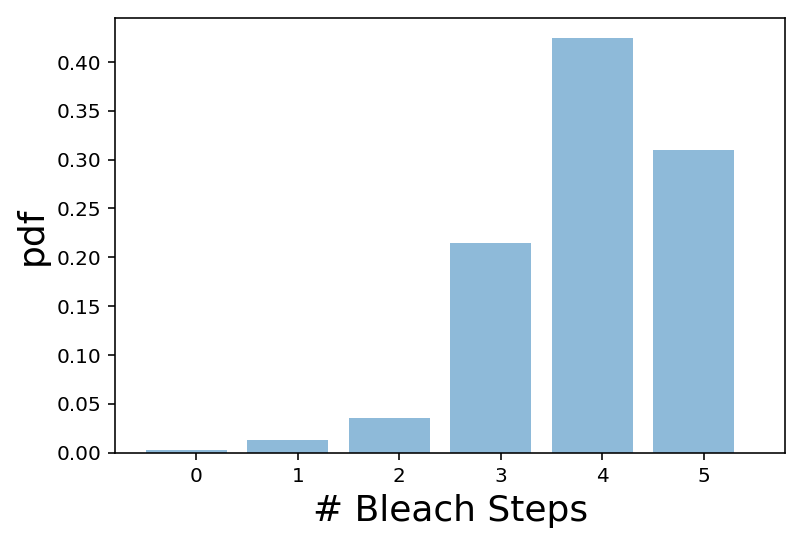

In [27]:
binEdges = np.arange(7) - 0.5  # -0.5, 0.5, 1.0, 1.5, ..., 5.0, 5.5

plt.hist(numBleachStepsObserved, bins=binEdges, density=True, width=0.8, alpha=0.5)
plt.xlabel('# Bleach Steps')
plt.ylabel('pdf');

## Loglikelihood vs the probability of observing each bleach step

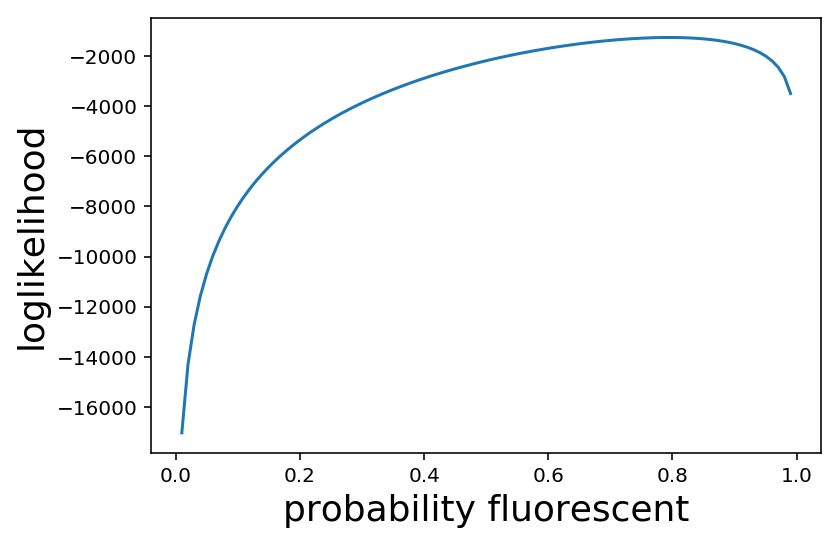

In [28]:
def loglikelihood(p):
    return st.binom.logpmf(numBleachStepsObserved, 5, p).sum()

ps = np.linspace(0.01, 1, 101)
LL = np.zeros(ps.shape)

for i, p in enumerate(ps):
    LL[i] = loglikelihood(p)

plt.plot(ps, LL)
plt.xlabel('probability fluorescent')
plt.ylabel('loglikelihood');

## Maximum loglikelihood <==> Minimum negative loglikelihood

In [29]:
import scipy.optimize as opt

def negloglikelihood(p):
    return -st.binom.logpmf(numBleachStepsObserved, 5, p).sum()

guess = [0.5]  # initial guess for p
bnds = opt.Bounds([0.01], [1])  # [lower bounds], [upper bounds]
result = opt.minimize(negloglikelihood, guess, method='slsqp', bounds=bnds)

result

     fun: 1258.6653382531333
     jac: array([-0.00076294])
 message: 'Optimization terminated successfully.'
    nfev: 22
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.79479997])

In [30]:
p = result.x[0]

print(f"Maximum likelihood estimate for probability that a fluorophore is observed is {p :.4f}")

Maximum likelihood estimate for probability that a fluorophore is observed is 0.7948


## Compare to result obtained by solving $\mu = n p$

In [31]:
p = numBleachStepsObserved.mean() / 5

p

0.7948000000000001

---
## **4. Example**: A single ion channel transitions between a closed and an open state. From the histogram of current amplitudes (pA) given below, estimate the single channel current and the average probability that it is either closed or open.

![Single Channel Recording](images/single_channel.png)

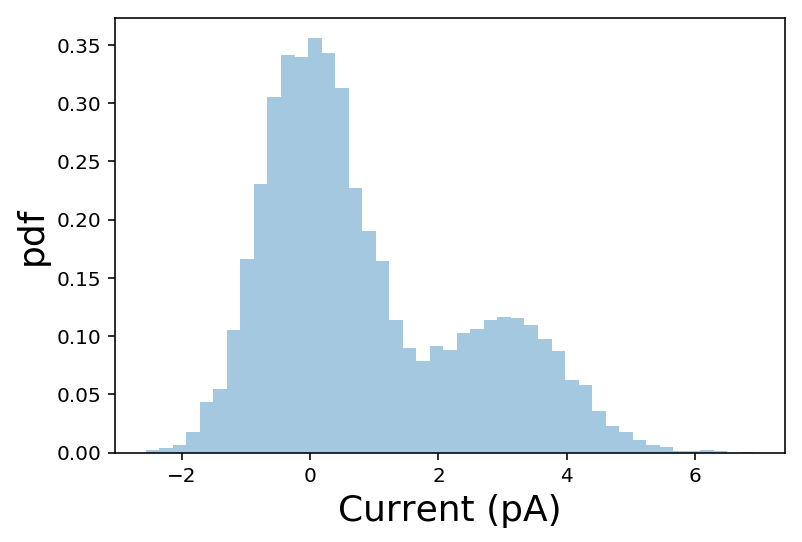

In [32]:
current_pA = np.concatenate([st.norm.rvs(0, 0.75, size=(7000,)),
                             st.norm.rvs(3, 1, size=(3000,))])

sns.distplot(current_pA, kde=False, norm_hist=True)
plt.xlabel('Current (pA)')
plt.ylabel('pdf');

In [33]:
def twoGaussPdf(data, params):
    A1, mu1, sd1, mu2, sd2 = params
    A2 = 1 - A1
    return A1 * st.norm.pdf(data, mu1, sd1) + A2 * st.norm.pdf(data, mu2, sd2)

def negloglikelihood(params):
    pdf = twoGaussPdf(current_pA, params)
    return -np.log(pdf).sum()

guess = [0.5, -1, 1, 7, 1]  # initial guess for A1, mu1, sd1, mu2, sd2
bnds = opt.Bounds([0, -5, 0.1, -5, 0.1], [1, 10, 5, 10, 5])  # [lower bounds], [upper bounds]
result = opt.minimize(negloglikelihood, guess, method='slsqp', bounds=bnds)

result

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


     fun: 17308.35347853129
     jac: array([ 0.05322266, -0.00317383,  0.00292969,  0.03833008,  0.02197266])
 message: 'Optimization terminated successfully.'
    nfev: 237
     nit: 31
    njev: 30
  status: 0
 success: True
       x: array([3.02282340e-01, 2.96562066e+00, 1.02115300e+00, 1.27036139e-03,
       7.49233576e-01])

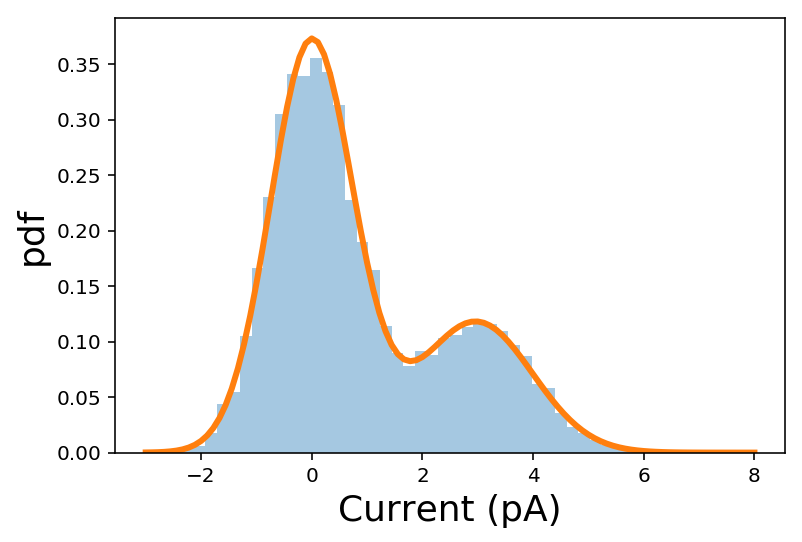

In [34]:
sns.distplot(current_pA, kde=False, norm_hist=True)
current = np.linspace(-3, 8, 100)
plt.plot(current, twoGaussPdf(current, result.x), lw=3)
plt.xlabel('Current (pA)')
plt.ylabel('pdf');

In [35]:
A1, mu1, sd1, mu2, sd2 = result.x
A2 = 1 - A1

if mu2 < mu1:
    A1, mu1, sd1, A2, mu2, sd2 = A2, mu2, sd2, A1, mu1, sd1

print(f"Single channel current is {mu2 - mu1 :.2f} pA")
print(f"Closed probability is {A1 :.2f}")
print(f"Open probability is {A2 :.2f}")

Single channel current is 2.96 pA
Closed probability is 0.70
Open probability is 0.30
